# Data Analytics YTIP2200, part4 - exercises

Return .ipynb file to Optima Return box Sun 7th Mar at latest.
Write in comment field which excercised you've done fully/partly. You can also comment which parts are done/missing.

You can write your solutions in new code cells between existing cells.

Don't use for loops etc.



# 1.  Combining
File http://gpspekka.kapsi.fi/dataanalytics/part4/bicycles.txt has data on available public city bicycles in four stations in Helsinki (summer 2017). Amounts are hourly averages.

File http://gpspekka.kapsi.fi/dataanalytics/part4/helsinki2017.csv has hourly weather observations from Helsinki from same period.

Load both files as DataFrames and combine DataFrames so that corresponding hours are at same rows.

Any hour that are in either of files should be included (bicycle file misses some hours).

Remove extra columns on result so that month/day/hour doesn't appear twice.

In [2]:
import pandas as pd

# read bike-data
df_bikes = pd.read_csv('http://gpspekka.kapsi.fi/dataanalytics/part4/bicycles.txt')

# change Hour-column format to same as on the second source file
df_bikes['Hour'] = df_bikes.Hour.map('{:02}:00'.format)

# match column names
df_bikes.rename(columns={'Month': 'month', 'Day': 'day', 'Hour': 'time'}, inplace = True)

# read bike-data and drop extra column with just index numbers
df_weather = pd.read_csv('http://gpspekka.kapsi.fi/dataanalytics/part4/helsinki2017.csv') 
df_weather = df_weather.drop('row', axis=1)

#df_bikes
#df_weather

# Merge both df's with outer join to keep all data
pd.merge(df_bikes, df_weather, how='outer')


#df['Hour'] = df.Hour.astype('timedelta64[h]')
#df['Hour'] = df['Hour'].replace('mitä','millä',regex=True, inplace = True)

# new_columns = df.columns.values
# new_columns[0] = 'month'
# new_columns[1] = 'day'
# new_columns[2] = 'time'
# df.columns = new_columns


,month,day,time,Sammonpuistikko,Hietaniemenkatu,Eteläinen Hesperiankatu,Kesäkatu,clouds (1/8),relative humidity (%),rain intensity (mm/h),air temperature (degC)
0,6,1,00:00,5.750000,NaN,12.0,14.416667,1,61,0.0,6.5
1,6,1,01:00,5.666667,NaN,12.0,15.000000,1,68,0.0,5.5
2,6,1,02:00,6.916667,NaN,12.0,15.000000,5,72,0.0,5.3
3,6,1,03:00,7.000000,NaN,12.0,15.000000,5,74,0.0,5.7
4,6,1,04:00,7.000000,NaN,12.0,15.000000,7,72,0.0,6.5
...,...,...,...,...,...,...,...,...,...,...,...
1459,7,28,12:00,NaN,NaN,NaN,NaN,7,71,0.0,21.4
1460,7,28,13:00,NaN,NaN,NaN,NaN,5,67,0.0,22.8
1461,7,28,14:00,NaN,NaN,NaN,NaN,5,71,0.0,21.7
1462,7,28,15:00,NaN,NaN,NaN,NaN,7,83,0.0,18.9


# 2a. Plot formatting
Below some code that outputs a chart.

Add code that modifies chart to appear like this:  
![model](http://gpspekka.kapsi.fi/dataanalytics/part4/model.png)

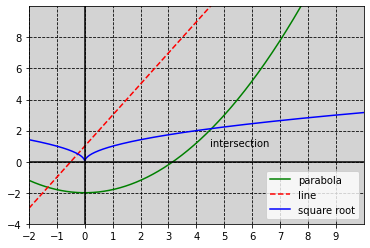

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


x = np.linspace(-2,10,1000)
df = pd.DataFrame({'x':x, 'b(x)': 0.2*x**2-2, 'c(x)': 2*x +1, 'd(x)': np.abs(x)**0.5})

graph = df.plot(x='x', y=['b(x)','c(x)','d(x)'])

# graafille harmaa taustaväri
graph.set_facecolor('#d3d3d3')

# gridille katkoviivat ja väri musta
graph.grid(linestyle = '--', color='k')


# piirretään ihan vain horisontaalinen ja vertikaalinen viiva x- ja y-akseleiksi
graph.axhline(y=0, color='k')
graph.axvline(x=0, color='k')

# gridin tick-välit ja mihin asti numerointi (labels) näkyy
plt.xticks(np.arange(-2, 10, step=1))
plt.yticks(np.arange(-4, 9, step=2))

# akseleille rajat, eli mihin asti grid näkyy
plt.xlim(-2,10)
plt.ylim(-4,10)

# viivojen tyylin muuttaminen jälkikäteen
plt.gca().get_lines()[0].set_color('green')
plt.gca().get_lines()[1].set_color('red')
plt.gca().get_lines()[1].set_linestyle('--')
plt.gca().get_lines()[2].set_color('blue')

# tein nämä tarkoituksella eri nimisiksi kuin esimerkkikuvassa, sillä siinä nimet oli sekaisin
graph.legend(('parabola', 'line', 'square root'), loc = 'lower right')

graph.text(4.5, 1, 'intersection')

# korvataa x-label, tyhjällä
plt.xlabel('')

plt.show()


# https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color

# https://www.pythonprogramming.in/customize-grid-color-and-style.html
# https://matplotlib.org/stable/api/colors_api.html

# https://stackoverflow.com/questions/25689238/show-origin-axis-x-y-in-matplotlib-plot
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axhspan_demo.html#sphx-glr-gallery-subplots-axes-and-figures-axhspan-demo-py

# https://stackoverflow.com/questions/41709257/how-to-change-the-plot-line-color-from-blue-to-black

# # x-akseli nollan kohdalle ja paksumpana
# graph.spines['left'].set_position('zero')
# graph.spines['left'].set_linewidth(2.0)
# # y-akseli nollan kohdalle ja paksumpana
# graph.spines['bottom'].set_position('zero')
# graph.spines['bottom'].set_linewidth(2.0)

# 2b. Weather (again)
File http://gpspekka.kapsi.fi/dataanalytics/part4/weather.txt has daily weather observations from Jyväskylä 2000-2021.

Prepare figure with 4 subfigures representing:
* line plot with daily snow depths 1st Jan to 28th Feb years 2018-2021. Make x-axis show "year day number 1->59". Replace -1 snow depth values with zero.
* bar plot with maximum snow depths of each February 2000-2021. Write text "max" & max value on top of highest bar.
* regplot with March (all years)  day number and max air temperature
* violinplot showing distribution on max and min temperatures from January days (all years) categorized with precipitation under 1 mm, 1-5 mm, over 5 mm

Model (colors etc may vary)  
![model2b](http://gpspekka.kapsi.fi/dataanalytics/part4/model2b.png)

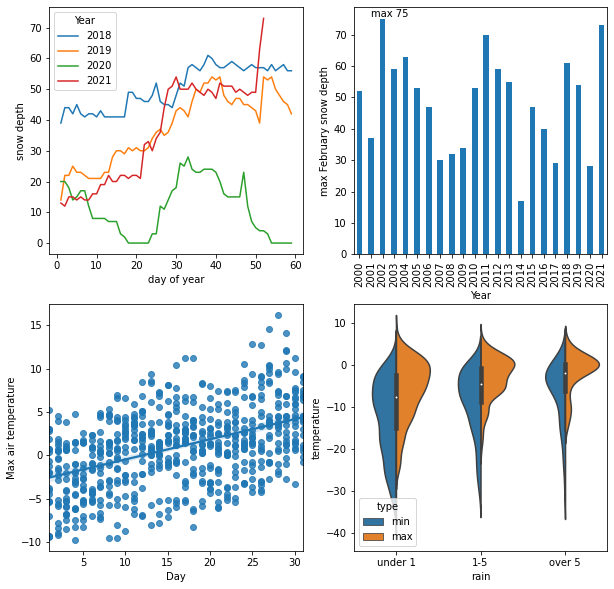

In [5]:
import seaborn as sns
df_weather = pd.read_csv('http://gpspekka.kapsi.fi/dataanalytics/part4/weather.txt', 
                sep = ',',
                decimal='.',
                usecols = [0,1,2,5,6,7,9,10])

# Replace -1 snow depth values with zero.
df_weather['Snow depth (cm)'].replace(-1, 0, inplace = True)

# Same to prepare the data for the violin plot
df_weather['Precipitation (mm)'].replace(-1, 0, inplace = True)


# Giving day numbers from 1-60 (2020 on karkausvuosi) to Jan & Feb dates
df_weather.loc[df_weather['Month'] == 1, 'YTD'] = df_weather['Day']
df_weather.loc[df_weather['Month'] == 2, 'YTD'] = df_weather['Day'] + 31

# We only want YTD 1-59, so marking rest with NaN
df_weather.loc[df_weather['YTD'] > 59, 'YTD'] = np.nan

# Df with only Jan and Feb dates and year 2018-2021
is_jan_feb = df_weather['YTD'].notna()
is_2018_2021 = df_weather['Year'] >= 2018
df_jan_feb_2018_2021 = df_weather[is_jan_feb & is_2018_2021]

# luodaan kuva ja sille 2 x 2 ruudukko, suurennetaan kuvan kokoa, että näkee jotain
fig, ax = plt.subplots(2,2,figsize=(10,10))

# top left - ryhmitellään vuoden mukaan
df_jan_feb_2018_2021.groupby('Year').plot(x='YTD', y='Snow depth (cm)', ax = ax[0,0])          

# Pekka, voiko alla olevalla luottaa saavansa legendiin sisällön aina oikeassa järjestyksessä?
# vuoden legendeiksi
groups = df_jan_feb_2018_2021.Year.unique().tolist()
ax[0][0].legend(groups, title="Year")

# labelit
ax[0][0].set_ylabel('snow depth')
ax[0][0].set_xlabel('day of year')


# bar plot with maximum snow depths of each February 2000-2021. Write text "max" & max value on top of highest bar. 
# only include Februaries
df_snow_feb = df_weather[df_weather['Month'] == 2]

# Max. depth each year
df_max_depth = df_snow_feb.groupby('Year')['Snow depth (cm)'].max()

# plotting on top right
df_max_depth.plot.bar(x='Snow depth (cm)', y='Year', ax = ax[0,1])  

# labelit
ax[0][1].set_ylabel('max February snow depth')
ax[0][1].set_xlabel('Year')

# tsekataan koko setin suurin arvo ja asetetaan se paikoilleen manuaalisesti (tähän olisi varmaan joku ei käsin puljattu tapa?)
max_value = df_max_depth.reindex().max()
ax[0][1].text(1, 75.5, 'max ' + str(int(max_value)))


# regplot with March (all years) day number and max air temperature
# only including March
df_march = df_weather[df_weather['Month'] == 3]

# bottom left - regplot
sns.regplot(x='Day', y='Max air temperature', data = df_march, ax = ax[1,0])



# violinplot showing distribution on max and min temperatures from January days (all years) 
# categorized with precipitation under 1 mm, 1-5 mm, over 5 mm
   
df_jan = df_weather[df_weather['Month'] == 1].reindex()

# categories: precipitation under 1 mm, 1-5 mm, over 5 mm
# we have earlier replaced all -1 with 0 and we use 10000 as the max for over 5 -bin (true max on this data is 24.9)
df_jan['category'] = pd.cut(df_jan['Precipitation (mm)'], bins=[0, 0.95, 5, 10000], include_lowest=True, labels=['under 1', '1-5', 'over 5'])

# Mari Möröltä idea yhdistelmätaulun luontiin (temp + type)

# Pekka, selittäisitkö minulle?
# laitoin näihin nyt ylimääräiset reindexit, ettei herjaa. Tutkin dokumentaatiota ja googlasin, 
# enkä ymmärrä miksi herjaa slicen kopioinnista silloin kun teen sen tuolla .loc :illa
# esim. https://re-thought.com/how-to-add-new-columns-in-a-dataframe-in-pandas/
df_max_temp = df_jan[['category', 'Max air temperature']].reindex()
df_max_temp.loc[:,'Type'] = 'max'
df_max_temp.rename(columns = {'Max air temperature':'temperature'}, inplace=True)

df_min_temp = df_jan[['category', 'Min air temperature']].reindex()
df_min_temp.loc[:,'Type'] = 'min'
df_min_temp.rename(columns = {'Min air temperature':'temperature'}, inplace=True)

df_temps = pd.concat([df_min_temp, df_max_temp], ignore_index=True)

sns.violinplot(x='category', y='temperature', hue='Type', split=True, data=df_temps)
ax[1][1].set_xlabel('rain')
ax[1][1].legend(loc = 'lower left', title = 'type')

plt.show()


#df_jan['Precipitation (mm)'].describe()
#ax[0,0].legend(('a', 'b', 'c', 'd'))

# http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/how-pandas-uses-matplotlib-plus-figures-axes-and-subplots/
# https://stackoverflow.com/questions/33049884/how-to-plot-2-seaborn-lmplots-side-by-side
# https://re-thought.com/how-to-add-new-columns-in-a-dataframe-in-pandas/

# 3. Auto-Seppo
Try to read large file (200 MB, 5 million lines) to DataFrame (download it to your own computer first):
http://gpspekka.kapsi.fi/trafi513.zip

Data has registration, approval and technical information for all vehicles in use from the register maintained by Traficom.

Fields are Finnish but English explanation is [here](http://gpspekka.kapsi.fi/dataanalytics/part4/fields.txt). 

`read_csv` requires parameters `sep=';'` and `encoding='latin_1'`.

Start with parameter `nrows=1000` which reads only 1000 first lines. Then raise that figure to see how much your computer "handles" (if not all).  You can time reading by adding line `%%time` at the top of the reading cell. Remember to save notebook before reading.

----
Filter only cars (*ajoneuvoluokka = M1*).

a) Then (in separate cell) choose some vechile make (*merkkiSelvakielinen*), like Tesla and make countplot of registration years (extract if from *ensirekisterointipvm*) of that make. Filter out values <2000.

b) Driving power of the vehicle is coded in *kayttovoima*, where 1 = petrol, 2 = diesel , >2 others. However petrol can be either float 1.0 or string 01 (as well as diesel). 

Prepare stacked bar plot presenting number of vechiles with petrol/diesel/other for years 2001-2020.

![model3](http://gpspekka.kapsi.fi/dataanalytics/part4/model3.png)
 

If you don't manage to read whole data, choose some other years/make since there aren't much  Teslas or >2010 cars in the first half of data.

In [400]:
%%time 
#1 min 30 s for 5000000, when all cols included
# 22.8s for 5000000, when usecols

df_cars = pd.read_csv('C:/Temp/DA/trafi513.zip', 
                sep = ';',
                encoding = 'latin_1',
                usecols = [0,1,18,25]
                # , nrows = 5000000
                     )

df_cars = df_cars[df_cars['ajoneuvoluokka'] == 'M1']

df_cars


<decorator-gen-62>:2: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.


Wall time: 23.5 s


,ajoneuvoluokka,ensirekisterointipvm,kayttovoima,merkkiSelvakielinen
2,M1,1984-07-09,1,Ford
5,M1,1990-05-08,1,Citroen
6,M1,2003-08-08,1,Renault
7,M1,2006-03-17,1,Toyota
8,M1,2007-01-05,2,Toyota
...,...,...,...,...
5121122,M1,2020-12-31,02,Mercedes-Benz
5121130,M1,2020-12-31,01,"Volkswagen, VW"
5121131,M1,2020-12-31,02,Volvo
5121133,M1,2020-12-31,02,"Volkswagen, VW"


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


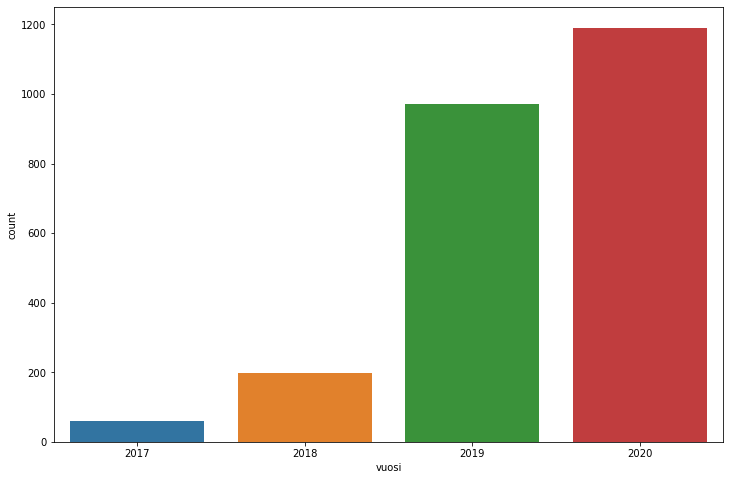

In [401]:
# Then (in separate cell) choose some vechile make (merkkiSelvakielinen), like Tesla and 
# make countplot of registration years (extract if from ensirekisterointipvm) of that make. Filter out values <2000.

df_make = df_cars[df_cars['merkkiSelvakielinen'] == 'Tesla']

# tehdään vuodelle oma sarake, johon otetaan ensirekisteröintipäivästä vuosi
df_make.loc[:, 'vuosi'] = df_make['ensirekisterointipvm'].str.split('-').str.get(0)

# otetaan mukaan vain rivit, joissa vuosi ei ole NaN
df_make = df_make[df_make['vuosi'].notna()]

# Filter out values < 2000
df_make = df_make[df_make['vuosi'].astype(int) >= 2000]

plt.figure(figsize=(12,8))
# countplot
sns.countplot(x='vuosi', data = df_make)


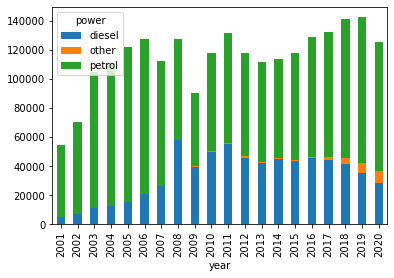

In [423]:


# Driving power of the vehicle is coded in kayttovoima, where 1 = petrol, 2 = diesel , >2 others. 
# However petrol can be either float 1.0 or string 01 (as well as diesel).
df_power = df_cars

# käyttövoima
df_power.loc[df_power['kayttovoima'] == 1.0, 'power'] = 'petrol'
df_power.loc[df_power['kayttovoima'] =='01', 'power'] = 'petrol'
df_power.loc[df_power['kayttovoima'] == 2.0, 'power'] = 'diesel'
df_power.loc[df_power['kayttovoima'] =='02', 'power'] = 'diesel'
df_power['power'].fillna('other', inplace = True)



# tehdään vuodelle oma sarake, johon otetaan ensirekisteröintipäivästä vuosi
df_power.loc[:, 'year'] = df_power['ensirekisterointipvm'].str.split('-').str.get(0)

# otetaan mukaan vain rivit, joissa vuosi ei ole NaN
df_power = df_power[df_power['year'].notna()]

# Filter out values < 2001
df_power = df_power[df_power['year'].astype(int) >= 2001]


# Max. depth each year
df_kayttovoima = df_power.groupby(['year', 'power']).size().reset_index().pivot(columns='power', index='year', values=0)

# plotting on top right
df_kayttovoima.plot.bar(stacked = True) 


# sns.countplot(x = 'year', data = df_power, hue = 'power')


# 4.  CV

File http://gpspekka.kapsi.fi/dataanalytics/part4/machine.csv  has data on one machine with 10-second interval. 

For each **hour** calculate **coefficient of variation (CV)** which is defined as **the ratio of the standard deviation to the mean**. I.e. that hour's standard deviation divided by hour's mean of values.

At first extract day-hour -info. No need to parse that as timestamps, strings work fine here (since they don't need to be sorted etc.) 

Then prepare plot from these CV values showing **under which CV value is x % of CV values**. I.e. x axis has 0-100 representing percentages and y axis has corresponding CV values.

Limit y axis to 0...0.1

Fill lowest 20 % green and largest 20 % red.

Model:
![model4](http://gpspekka.kapsi.fi/dataanalytics/part4/model4.png)

# 5. TOP-4
File http://gpspekka.kapsi.fi/dataanalytics/part4/epl1.txt has English premier league results 1992-2020. 

Fields needed:
* season
* Date (sortable as string)
* HomeTeam
* AwayTeam
* FTHG (fulltime home goals)
* FTAG (fulltime away goals)

Win gives 3 points and draw gives 1 point.

Calculate for each season for each team
* how many points team has achieved from their *first 25 games of the season*
* what's their point difference to 4th place (4th most points) after 25 games

Model of point tally:
![model1](http://gpspekka.kapsi.fi/dataanalytics/part4/model5_1.png)

Model of point difference:
![model2](http://gpspekka.kapsi.fi/dataanalytics/part4/model5_2.png)

File http://gpspekka.kapsi.fi/dataanalytics/part4/epl2.txt has each team's final placing in each season.

Combine data from these files to answer question: 

**Which has been highest point differences to 4th place after 25 games among those teams that have finally been in TOP-4 after the season?**

Model of answer:

![model3](http://gpspekka.kapsi.fi/dataanalytics/part4/model5_3.png)


*Due to game scheludes teams reach 25 games in different days so point differences calculated here are not any real league table snapshots. We just take 25 first games for each team.*